In [1]:
import requests
import os
import pandas as pd
from datetime import datetime, timezone
from dotenv import load_dotenv

In [2]:
load_dotenv()

# Configuration
API_KEY = os.getenv('owm_api_key')
BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution/history"

# Karachi Coordinates
LAT = 24.8607
LON = 67.0011

In [3]:
# Date Range: Jan 1, 2024 to Now
# UNIX timestamps
START_DATE = int(datetime(2024, 1, 1, tzinfo=timezone.utc).timestamp())
END_DATE = int(datetime.now(timezone.utc).timestamp())

In [4]:
def get_aqi_history_data():
    if not API_KEY:
        print("Error: 'openweathermap_api_key' not found in .env file.")
        print("Please fetch one from https://openweathermap.org/ and add it to .env")
        return

    params = {
        "lat": LAT,
        "lon": LON,
        "start": START_DATE,
        "end": END_DATE,
        "appid": API_KEY
    }

    print(f"Fetching OWM Air Pollution history for Karachi...")
    print(f"Time Range: {datetime.fromtimestamp(START_DATE, timezone.utc)} to {datetime.fromtimestamp(END_DATE, timezone.utc)}")

    try:
        response = requests.get(BASE_URL, params=params)
        
        if response.status_code != 200:
            print(f"Error fetching data: {response.status_code}")
            print(response.text)
            return

        data = response.json()
        raw_list = data.get('list', [])
        
        print(f"Retrieved {len(raw_list)} data points.")

        parsed_data = []
        for item in raw_list:
            dt = item.get('dt')
            components = item.get('components', {})
            main = item.get('main', {}) # contains 'aqi'

            # OWM returns data in UNIX timestamp
            timestamp = datetime.fromtimestamp(dt, timezone.utc)
            
            record = {
                'datetime_utc': timestamp,
                'aqi_owm': main.get('aqi'),
                'co': components.get('co'),
                'no': components.get('no'),
                'no2': components.get('no2'),
                'o3': components.get('o3'),
                'so2': components.get('so2'),
                'pm2_5': components.get('pm2_5'),
                'pm10': components.get('pm10'),
                'nh3': components.get('nh3'),
                'lat': LAT,
                'lon': LON
            }
            parsed_data.append(record)

        if parsed_data:
            df = pd.DataFrame(parsed_data)
            return df
            
            print("\nData Sample:")
            print(df.head(15))
        else:
            print("No data found in response.")

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
    except Exception as e:
         print(f"An unexpected error occurred: {e}")

In [5]:
df = get_aqi_history_data()

Fetching OWM Air Pollution history for Karachi...
Time Range: 2024-01-01 00:00:00+00:00 to 2026-01-19 14:36:31+00:00
Retrieved 17583 data points.


In [6]:
df.head(15)

,datetime_utc,aqi_owm,co,no,no2,o3,so2,pm2_5,pm10,nh3,lat,lon
0,2024-01-01 00:00:00+00:00,5.0,1295.09,0.00,18.16,88.69,18.36,189.51,227.66,14.82,24.8607,67.0011
1,2024-01-01 01:00:00+00:00,5.0,1401.90,0.00,21.76,84.40,19.31,197.43,236.63,16.21,24.8607,67.0011
2,2024-01-01 02:00:00+00:00,5.0,1735.69,0.00,33.59,74.39,22.41,219.53,261.52,21.03,24.8607,67.0011
3,2024-01-01 03:00:00+00:00,5.0,2723.69,0.09,69.23,46.49,28.85,271.94,323.95,33.44,24.8607,67.0011
4,2024-01-01 04:00:00+00:00,5.0,3417.97,6.59,93.22,28.97,33.38,298.78,360.56,40.02,24.8607,67.0011
5,2024-01-01 05:00:00+00:00,5.0,3417.97,15.42,85.68,42.20,35.76,298.66,364.62,40.02,24.8607,67.0011
6,2024-01-01 06:00:00+00:00,5.0,2937.32,11.40,67.86,75.82,38.15,285.57,350.37,34.96,24.8607,67.0011
7,2024-01-01 07:00:00+00:00,5.0,1842.50,4.81,39.41,124.45,35.76,221.74,275.84,18.75,24.8607,67.0011
8,2024-01-01 08:00:00+00:00,5.0,1588.82,3.63,33.24,141.62,35.29,197.20,247.12,15.20,24.8607,67.0011
9,2024-01-01 09:00:00+00:00,5.0,1575.47,3.30,34.27,147.34,36.72,192.15,241.37,14.57,24.8607,67.0011


checking the formats/units of the pollutants from the API

In [7]:
print(df[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']].describe())

                 co            no           no2            o3           so2  \
count  17583.000000  17583.000000  17583.000000  17583.000000  17583.000000   
mean     886.587887      4.709005     21.440756     69.398195      9.647067   
std     1547.510404     18.173912    114.400652     44.866045     15.029680   
min       66.760000      0.000000  -9999.000000      0.000000      0.060000   
25%      117.190000      0.000000      0.110000     41.050000      0.530000   
50%      327.110000      0.010000      5.230000     55.070000      3.250000   
75%      826.145000      1.190000     25.020000     97.270000     10.635000   
max    15167.240000    275.370000    444.170000    572.200000    127.790000   

              pm2_5          pm10  
count  17583.000000  17583.000000  
mean      62.658911    117.909869  
std       89.680485    132.587701  
min        0.000000  -9999.000000  
25%       17.320000     55.910000  
50%       31.520000     86.800000  
75%       64.465000    144.120000  


All pollutants are in micrograms per cubic meter (µg/m³). so we need to convert them to get accurate AQI Calculations

In [8]:
# Convert pollutants from μg/m³ to required units for AQI calculation
df['co'] = df['co'] / 1145  # CO: μg/m³ to ppm
df['no2'] = df['no2'] * 0.532  # NO2: μg/m³ to ppb
df['o3'] = df['o3'] * 0.510  # O3: μg/m³ to ppb
df['so2'] = df['so2'] * 0.382  # SO2: μg/m³ to ppb

Now calculating the Acutal AQI values in 0 to 500 range using all pollutants available in the dataset

In [9]:
def calculate_aqi_all_pollutants(row):
    """
    Calculate AQI based on all pollutants and return the maximum (worst) AQI.
    Returns value in 0-500 range.
    Uses converted pollutant values (ppm/ppb).
    """
    
    # PM2.5 breakpoints (μg/m³)
    bp_pm25 = [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500)
    ]
    
    # PM10 breakpoints (μg/m³)
    bp_pm10 = [
        (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 504, 301, 400),
        (505, 604, 401, 500)
    ]
    
    # CO breakpoints (ppm)
    bp_co = [
        (0.0, 4.4, 0, 50),
        (4.5, 9.4, 51, 100),
        (9.5, 12.4, 101, 150),
        (12.5, 15.4, 151, 200),
        (15.5, 30.4, 201, 300),
        (30.5, 40.4, 301, 400),
        (40.5, 50.4, 401, 500)
    ]
    
    # NO2 breakpoints (ppb)
    bp_no2 = [
        (0, 53, 0, 50),
        (54, 100, 51, 100),
        (101, 360, 101, 150),
        (361, 649, 151, 200),
        (650, 1249, 201, 300),
        (1250, 1649, 301, 400),
        (1650, 2049, 401, 500)
    ]
    
    # O3 breakpoints (ppb) - 8hr average
    bp_o3 = [
        (0, 54, 0, 50),
        (55, 70, 51, 100),
        (71, 85, 101, 150),
        (86, 105, 151, 200),
        (106, 200, 201, 300),
        (405, 504, 301, 400),
        (505, 604, 401, 500)
    ]
    
    # SO2 breakpoints (ppb) - 1hr average
    bp_so2 = [
        (0, 35, 0, 50),
        (36, 75, 51, 100),
        (76, 185, 101, 150),
        (186, 304, 151, 200),
        (305, 604, 201, 300),
        (605, 804, 301, 400),
        (805, 1004, 401, 500)
    ]
    
    def get_aqi_subindex(c, breakpoints):
        """Calculate AQI sub-index for a given concentration"""
        if pd.isna(c):
            return 0
        
        for (c_lo, c_hi, i_lo, i_hi) in breakpoints:
            if c_lo <= c <= c_hi:
                return ((i_hi - i_lo) / (c_hi - c_lo)) * (c - c_lo) + i_lo
        
        # Handle values beyond max breakpoint
        if c > breakpoints[-1][1]:
            return 500
        return 0
    
    # Calculate sub-indices using converted pollutant columns
    aqi_pm25 = get_aqi_subindex(row['pm2_5'], bp_pm25)
    aqi_pm10 = get_aqi_subindex(row['pm10'], bp_pm10)
    aqi_co = get_aqi_subindex(row['co'], bp_co)
    aqi_no2 = get_aqi_subindex(row['no2'], bp_no2)
    aqi_o3 = get_aqi_subindex(row['o3'], bp_o3)
    aqi_so2 = get_aqi_subindex(row['so2'], bp_so2)
    
    # Return the maximum AQI (worst pollutant determines overall AQI)
    return round(max(aqi_pm25, aqi_pm10, aqi_co, aqi_no2, aqi_o3, aqi_so2))

# Apply the function to create calculated_aqi column
df['calculated_aqi'] = df.apply(calculate_aqi_all_pollutants, axis=1)

# Display the result
df[['pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2', 'calculated_aqi']].head(15)

,pm2_5,pm10,co,no2,o3,so2,calculated_aqi
0,189.51,227.66,1.131083,9.66112,45.2319,7.01352,240
1,197.43,236.63,1.224367,11.57632,43.0440,7.37642,248
2,219.53,261.52,1.515886,17.86988,37.9389,8.56062,269
3,271.94,323.95,2.378769,36.83036,23.7099,11.02070,322
4,298.78,360.56,2.985127,49.59304,14.7747,12.75116,349
5,298.66,364.62,2.985127,45.58176,21.5220,13.66032,349
6,285.57,350.37,2.565345,36.10152,38.6682,14.57330,336
7,221.74,275.84,1.609170,20.96612,63.4695,13.66032,272
8,197.20,247.12,1.387616,17.68368,72.2262,13.48078,247
9,192.15,241.37,1.375956,18.23164,75.1434,14.02704,242


In [10]:
df.isnull().sum()

datetime_utc      0
aqi_owm           0
co                0
no                0
no2               0
o3                0
so2               0
pm2_5             0
pm10              0
nh3               0
lat               0
lon               0
calculated_aqi    0
dtype: int64

In [11]:
df.describe()

,aqi_owm,co,no,no2,o3,so2,pm2_5,pm10,nh3,lat,lon,calculated_aqi
count,17583.000000,17583.000000,17583.000000,17583.000000,17583.000000,17583.000000,17583.000000,17583.000000,17583.000000,1.758300e+04,1.758300e+04,17583.000000
mean,3.483301,0.774313,4.709005,11.406482,35.393080,3.685180,62.658911,117.909869,8.172079,2.486070e+01,6.700110e+01,118.655861
std,1.087948,1.351537,18.173912,60.861147,22.881683,5.741338,89.680485,132.587701,16.869142,3.552815e-15,1.421126e-14,84.560610
min,1.000000,0.058306,0.000000,-5319.468000,0.000000,0.022920,0.000000,-9999.000000,0.000000,2.486070e+01,6.700110e+01,16.000000
25%,3.000000,0.102349,0.000000,0.058520,20.935500,0.202460,17.320000,55.910000,0.000000,2.486070e+01,6.700110e+01,63.000000
50%,3.000000,0.285686,0.010000,2.782360,28.085700,1.241500,31.520000,86.800000,1.080000,2.486070e+01,6.700110e+01,93.000000
75%,4.000000,0.721524,1.190000,13.310640,49.607700,4.062570,64.465000,144.120000,7.790000,2.486070e+01,6.700110e+01,156.000000
max,5.555580,13.246498,275.370000,236.298440,291.822000,48.815780,967.960000,1096.630000,178.340000,2.486070e+01,6.700110e+01,500.000000


In [12]:
# extract hour, day of week, month, and year from datetime_utc
def extract_features(df):
    df['hour'] = df['datetime_utc'].dt.hour
    df['day_of_week'] = df['datetime_utc'].dt.dayofweek
    df['month'] = df['datetime_utc'].dt.month
    df['year'] = df['datetime_utc'].dt.year
    return df

# create a binary feature for weekend/weekday
def create_weekend_feature(df):
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    return df

# create a feature for season (winter, spring, summer, fall)
def create_season_feature(df):
    season_map = {
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    }
    df['season'] = df['month'].map(season_map)
    return df



In [13]:
df = extract_features(df)
df = create_weekend_feature(df)
df = create_season_feature(df)
df.head(15)


,datetime_utc,aqi_owm,co,no,no2,o3,so2,pm2_5,pm10,nh3,lat,lon,calculated_aqi,hour,day_of_week,month,year,is_weekend,season
0,2024-01-01 00:00:00+00:00,5.0,1.131083,0.00,9.66112,45.2319,7.01352,189.51,227.66,14.82,24.8607,67.0011,240,0,0,1,2024,0,Winter
1,2024-01-01 01:00:00+00:00,5.0,1.224367,0.00,11.57632,43.0440,7.37642,197.43,236.63,16.21,24.8607,67.0011,248,1,0,1,2024,0,Winter
2,2024-01-01 02:00:00+00:00,5.0,1.515886,0.00,17.86988,37.9389,8.56062,219.53,261.52,21.03,24.8607,67.0011,269,2,0,1,2024,0,Winter
3,2024-01-01 03:00:00+00:00,5.0,2.378769,0.09,36.83036,23.7099,11.02070,271.94,323.95,33.44,24.8607,67.0011,322,3,0,1,2024,0,Winter
4,2024-01-01 04:00:00+00:00,5.0,2.985127,6.59,49.59304,14.7747,12.75116,298.78,360.56,40.02,24.8607,67.0011,349,4,0,1,2024,0,Winter
5,2024-01-01 05:00:00+00:00,5.0,2.985127,15.42,45.58176,21.5220,13.66032,298.66,364.62,40.02,24.8607,67.0011,349,5,0,1,2024,0,Winter
6,2024-01-01 06:00:00+00:00,5.0,2.565345,11.40,36.10152,38.6682,14.57330,285.57,350.37,34.96,24.8607,67.0011,336,6,0,1,2024,0,Winter
7,2024-01-01 07:00:00+00:00,5.0,1.609170,4.81,20.96612,63.4695,13.66032,221.74,275.84,18.75,24.8607,67.0011,272,7,0,1,2024,0,Winter
8,2024-01-01 08:00:00+00:00,5.0,1.387616,3.63,17.68368,72.2262,13.48078,197.20,247.12,15.20,24.8607,67.0011,247,8,0,1,2024,0,Winter
9,2024-01-01 09:00:00+00:00,5.0,1.375956,3.30,18.23164,75.1434,14.02704,192.15,241.37,14.57,24.8607,67.0011,242,9,0,1,2024,0,Winter


In [14]:
# AQI lags: 1hr, 3hr, 6hr, 24hr
def create_lags(df):
    for i in range(1, 5):
        df[f'aqi_lag_{i}'] = df['calculated_aqi'].shift(i)
    return df
    
# Rolling averages: 6hr, 24hr for AQI
def create_rolling_averages(df):    
    df['aqi_6hr_avg'] = df['calculated_aqi'].rolling(window=6).mean()
    df['aqi_24hr_avg'] = df['calculated_aqi'].rolling(window=24).mean()
    return df

In [15]:
df = create_lags(df)
df = create_rolling_averages(df)
df.head(15)

,datetime_utc,aqi_owm,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,month,year,is_weekend,season,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_lag_4,aqi_6hr_avg,aqi_24hr_avg
0,2024-01-01 00:00:00+00:00,5.0,1.131083,0.00,9.66112,45.2319,7.01352,189.51,227.66,14.82,...,1,2024,0,Winter,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01 01:00:00+00:00,5.0,1.224367,0.00,11.57632,43.0440,7.37642,197.43,236.63,16.21,...,1,2024,0,Winter,240.0,NaN,NaN,NaN,NaN,NaN
2,2024-01-01 02:00:00+00:00,5.0,1.515886,0.00,17.86988,37.9389,8.56062,219.53,261.52,21.03,...,1,2024,0,Winter,248.0,240.0,NaN,NaN,NaN,NaN
3,2024-01-01 03:00:00+00:00,5.0,2.378769,0.09,36.83036,23.7099,11.02070,271.94,323.95,33.44,...,1,2024,0,Winter,269.0,248.0,240.0,NaN,NaN,NaN
4,2024-01-01 04:00:00+00:00,5.0,2.985127,6.59,49.59304,14.7747,12.75116,298.78,360.56,40.02,...,1,2024,0,Winter,322.0,269.0,248.0,240.0,NaN,NaN
5,2024-01-01 05:00:00+00:00,5.0,2.985127,15.42,45.58176,21.5220,13.66032,298.66,364.62,40.02,...,1,2024,0,Winter,349.0,322.0,269.0,248.0,296.166667,NaN
6,2024-01-01 06:00:00+00:00,5.0,2.565345,11.40,36.10152,38.6682,14.57330,285.57,350.37,34.96,...,1,2024,0,Winter,349.0,349.0,322.0,269.0,312.166667,NaN
7,2024-01-01 07:00:00+00:00,5.0,1.609170,4.81,20.96612,63.4695,13.66032,221.74,275.84,18.75,...,1,2024,0,Winter,336.0,349.0,349.0,322.0,316.166667,NaN
8,2024-01-01 08:00:00+00:00,5.0,1.387616,3.63,17.68368,72.2262,13.48078,197.20,247.12,15.20,...,1,2024,0,Winter,272.0,336.0,349.0,349.0,312.500000,NaN
9,2024-01-01 09:00:00+00:00,5.0,1.375956,3.30,18.23164,75.1434,14.02704,192.15,241.37,14.57,...,1,2024,0,Winter,247.0,272.0,336.0,349.0,299.166667,NaN


### When creating lag features:

1hr lag: First row becomes NaN (no previous hour exists)
6hr lag: First 6 rows become NaN
24hr lag: First 24 rows become NaN
24hr rolling average: First 24 rows become NaN (need 24 values to calculate average)

So your first 24 rows will have NaN values - that's unavoidable with lag features.

In [16]:
# drop rows with missing values as we got some missing values in the data

df = df.dropna()
df.head(15)

,datetime_utc,aqi_owm,co,no,no2,o3,so2,pm2_5,pm10,nh3,...,month,year,is_weekend,season,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_lag_4,aqi_6hr_avg,aqi_24hr_avg
23,2024-01-01 23:00:00+00:00,5.0,1.749100,0.00,16.41220,33.9252,7.65146,252.74,297.31,22.04,...,1,2024,0,Winter,308.0,325.0,381.0,443.0,376.666667,351.166667
24,2024-01-02 00:00:00+00:00,5.0,1.679135,0.00,15.31628,35.7510,7.37642,251.38,294.79,20.52,...,1,2024,0,Winter,303.0,308.0,325.0,381.0,343.666667,353.750000
25,2024-01-02 01:00:00+00:00,5.0,1.655808,0.00,16.41220,35.3838,7.37642,249.82,292.29,19.76,...,1,2024,0,Winter,302.0,303.0,308.0,325.0,319.666667,355.875000
26,2024-01-02 02:00:00+00:00,5.0,2.005633,0.00,24.79652,29.9115,8.65230,271.15,317.58,24.57,...,1,2024,0,Winter,299.0,302.0,303.0,308.0,309.666667,358.041667
27,2024-01-02 03:00:00+00:00,5.0,3.171694,0.86,51.05072,11.3985,11.65864,336.95,398.27,39.52,...,1,2024,0,Winter,321.0,299.0,302.0,303.0,320.000000,360.750000
28,2024-01-02 04:00:00+00:00,5.0,4.337764,25.26,64.90932,2.7795,13.84368,385.19,470.26,52.18,...,1,2024,0,Winter,387.0,321.0,299.0,302.0,339.333333,363.875000
29,2024-01-02 05:00:00+00:00,5.0,4.850830,52.30,64.90932,5.7018,15.48246,401.50,504.96,62.32,...,1,2024,0,Winter,424.0,387.0,321.0,299.0,361.333333,367.458333
30,2024-01-02 06:00:00+00:00,5.0,4.804183,49.17,66.36700,11.6739,17.30460,406.94,514.36,65.86,...,1,2024,0,Winter,435.0,424.0,387.0,321.0,384.000000,371.708333
31,2024-01-02 07:00:00+00:00,5.0,2.891843,14.75,48.13536,36.1131,20.03590,299.24,378.55,36.98,...,1,2024,0,Winter,438.0,435.0,424.0,387.0,392.333333,374.916667
32,2024-01-02 08:00:00+00:00,5.0,2.425415,8.27,41.20872,52.5300,21.85804,273.95,348.26,30.15,...,1,2024,0,Winter,349.0,438.0,435.0,424.0,392.833333,378.125000


In [17]:
df.columns

Index(['datetime_utc', 'aqi_owm', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5',
       'pm10', 'nh3', 'lat', 'lon', 'calculated_aqi', 'hour', 'day_of_week',
       'month', 'year', 'is_weekend', 'season', 'aqi_lag_1', 'aqi_lag_2',
       'aqi_lag_3', 'aqi_lag_4', 'aqi_6hr_avg', 'aqi_24hr_avg'],
      dtype='object')

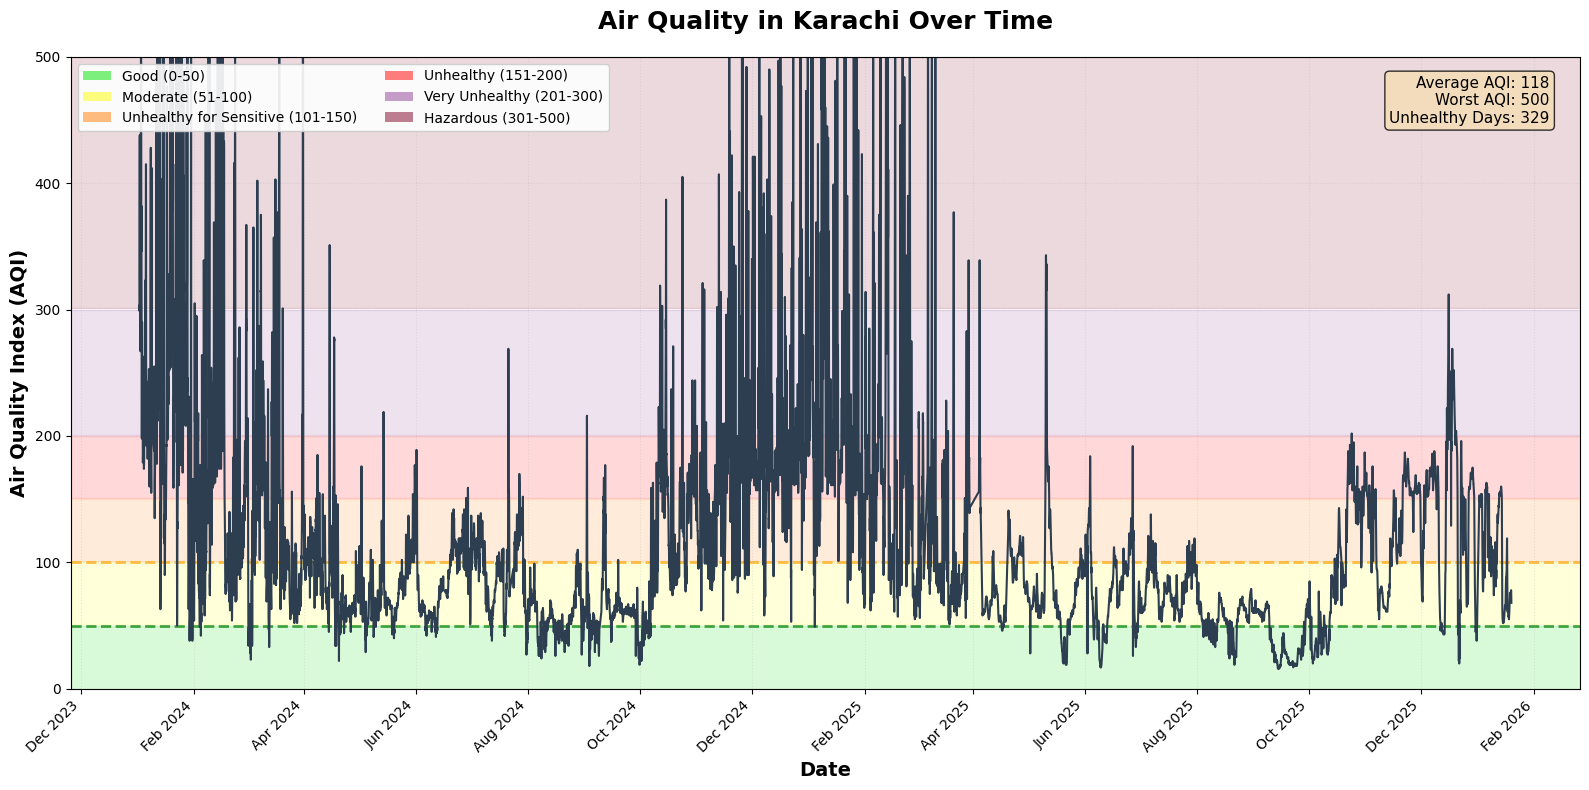

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

def plot_aqi_timeline(df):
    """
    Create an intuitive AQI timeline with color-coded regions.
    Easy for non-technical people to understand.
    """
    
    # Create figure
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Define AQI categories and colors (EPA standard)
    aqi_categories = [
        (0, 50, '#00E400', 'Good'),           # Green
        (51, 100, '#FFFF00', 'Moderate'),     # Yellow
        (101, 150, '#FF7E00', 'Unhealthy for Sensitive Groups'),  # Orange
        (151, 200, '#FF0000', 'Unhealthy'),   # Red
        (201, 300, '#8F3F97', 'Very Unhealthy'),  # Purple
        (301, 500, '#7E0023', 'Hazardous')    # Maroon
    ]
    
    # Add colored background bands for AQI categories
    for low, high, color, label in aqi_categories:
        ax.axhspan(low, high, alpha=0.15, color=color, zorder=0)
    
    # Plot the AQI line
    ax.plot(df['datetime_utc'], df['calculated_aqi'], 
            color='#2C3E50', linewidth=1.5, zorder=2, label='AQI Level')
    
    # Add horizontal reference lines
    ax.axhline(y=50, color='green', linestyle='--', linewidth=2, 
               alpha=0.7, label='Good/Moderate Threshold', zorder=1)
    ax.axhline(y=100, color='orange', linestyle='--', linewidth=2, 
               alpha=0.7, label='Moderate/Unhealthy Threshold', zorder=1)
    
    # Formatting
    ax.set_xlabel('Date', fontsize=14, fontweight='bold')
    ax.set_ylabel('Air Quality Index (AQI)', fontsize=14, fontweight='bold')
    ax.set_title('Air Quality in Karachi Over Time', 
                 fontsize=18, fontweight='bold', pad=20)
    
    # Set y-axis limits
    ax.set_ylim(0, min(df['calculated_aqi'].max() + 50, 500))
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.xticks(rotation=45, ha='right')
    
    # Add grid for easier reading
    ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8, zorder=0)
    
    # Add legend with AQI categories
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#00E400', alpha=0.5, label='Good (0-50)'),
        Patch(facecolor='#FFFF00', alpha=0.5, label='Moderate (51-100)'),
        Patch(facecolor='#FF7E00', alpha=0.5, label='Unhealthy for Sensitive (101-150)'),
        Patch(facecolor='#FF0000', alpha=0.5, label='Unhealthy (151-200)'),
        Patch(facecolor='#8F3F97', alpha=0.5, label='Very Unhealthy (201-300)'),
        Patch(facecolor='#7E0023', alpha=0.5, label='Hazardous (301-500)')
    ]
    
    ax.legend(handles=legend_elements, loc='upper left', 
             fontsize=10, framealpha=0.9, ncol=2)
    
    # Add text box with summary statistics
    avg_aqi = df['calculated_aqi'].mean()
    max_aqi = df['calculated_aqi'].max()
    days_unhealthy = (df['calculated_aqi'] > 100).sum() / 24  # Convert hours to days
    
    textstr = f'Average AQI: {avg_aqi:.0f}\nWorst AQI: {max_aqi:.0f}\nUnhealthy Days: {days_unhealthy:.0f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.98, 0.97, textstr, transform=ax.transAxes, 
            fontsize=11, verticalalignment='top', horizontalalignment='right',
            bbox=props)
    
    plt.tight_layout()
    plt.show()

# Create the visualization
plot_aqi_timeline(df)

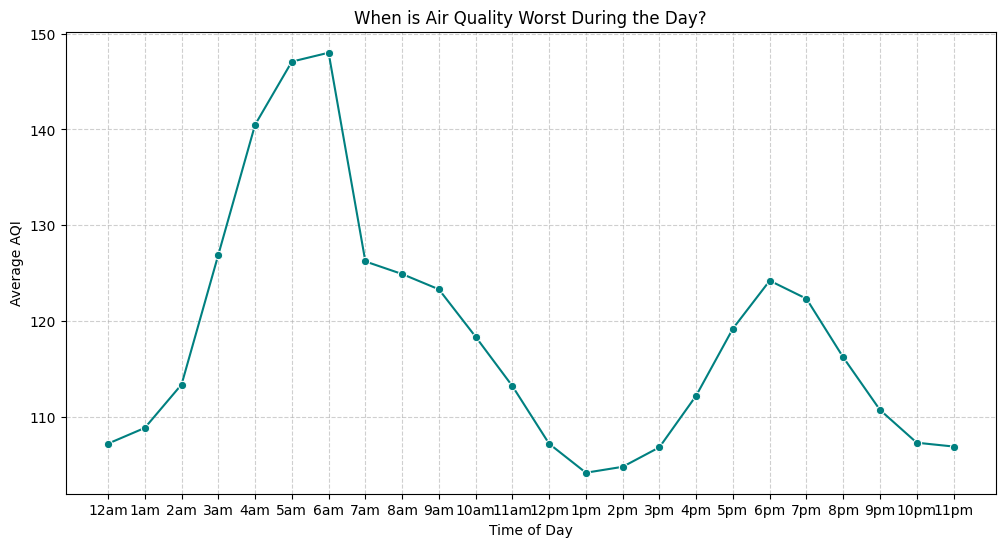

In [19]:
# Calculate average AQI for each hour
hourly_aqi = df.groupby('hour')['calculated_aqi'].mean()
hourly_aqi.index = [f"{h % 12 or 12}{'am' if h < 12 else 'pm'}" for h in hourly_aqi.index]

# Create the visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_aqi.index, y=hourly_aqi.values, marker='o', color='teal')
plt.title('When is Air Quality Worst During the Day?')
plt.xlabel('Time of Day')
plt.ylabel('Average AQI')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


/tmp/ipykernel_37924/2761516223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


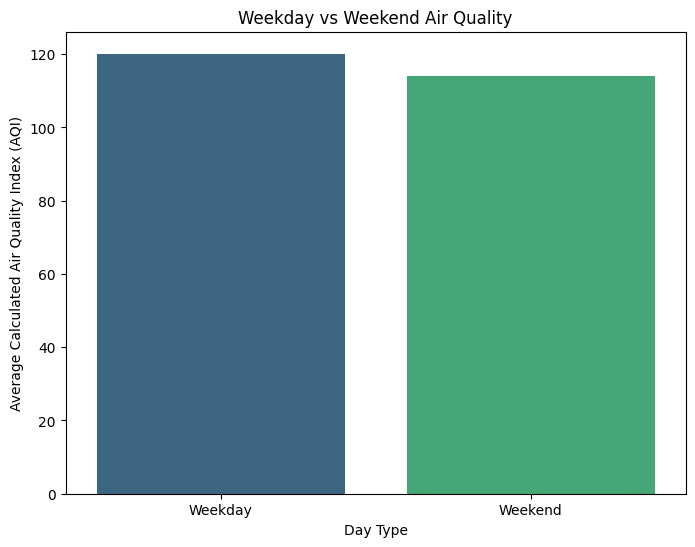

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=pd.to_datetime(df['datetime_utc']).dt.dayofweek.map(lambda x: 'Weekend' if x >= 5 else 'Weekday'),
    y=df['calculated_aqi'],
    palette='viridis',
    errorbar=None
)
plt.title('Weekday vs Weekend Air Quality')
plt.xlabel('Day Type')
plt.ylabel('Average Calculated Air Quality Index (AQI)')
plt.show()


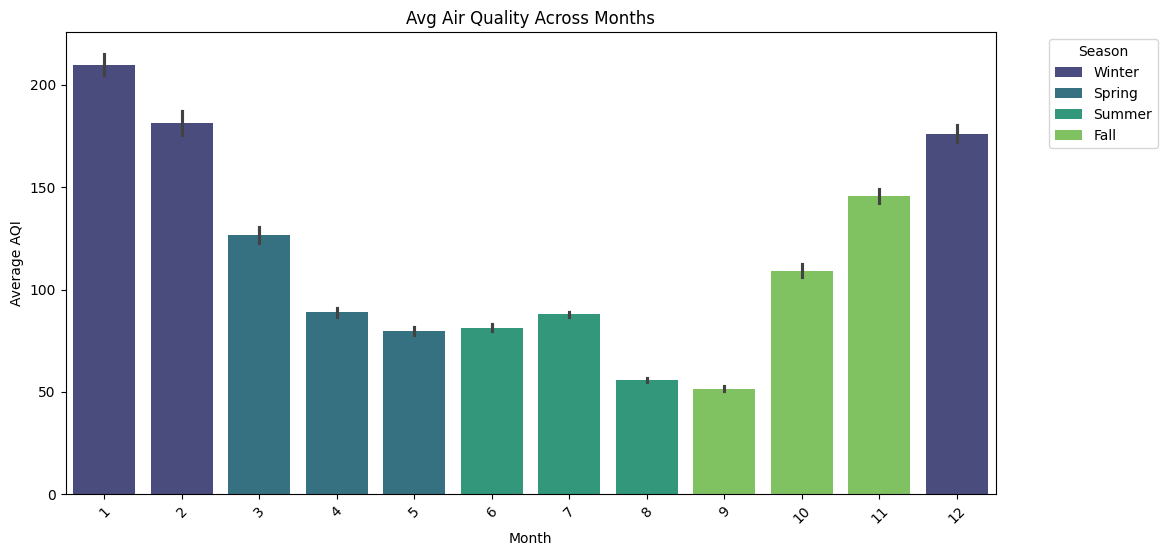

In [21]:

# Calculate average AQI for each month and plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='month', y='calculated_aqi', hue='season', dodge=False, palette='viridis')
plt.title('Avg Air Quality Across Months')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Calculating dominant pollutants...


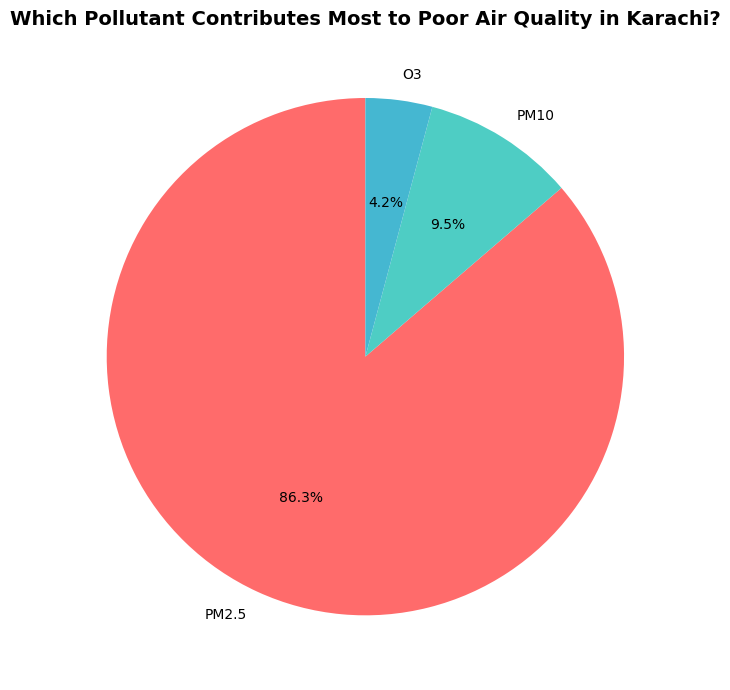

In [22]:
def analyze_pollutant_contributions(df):
    """
    Analyze which pollutants contribute most to AQI without adding columns.
    Returns statistics and creates visualizations.
    """
    
    # PM2.5 breakpoints (μg/m³)
    bp_pm25 = [
        (0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500)
    ]
    
    # PM10 breakpoints (μg/m³)
    bp_pm10 = [
        (0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150),
        (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400),
        (505, 604, 401, 500)
    ]
    
    # CO breakpoints (ppm)
    bp_co = [
        (0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150),
        (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400),
        (40.5, 50.4, 401, 500)
    ]
    
    # NO2 breakpoints (ppb)
    bp_no2 = [
        (0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150),
        (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400),
        (1650, 2049, 401, 500)
    ]
    
    # O3 breakpoints (ppb)
    bp_o3 = [
        (0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150),
        (86, 105, 151, 200), (106, 200, 201, 300), (405, 504, 301, 400),
        (505, 604, 401, 500)
    ]
    
    # SO2 breakpoints (ppb)
    bp_so2 = [
        (0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150),
        (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400),
        (805, 1004, 401, 500)
    ]
    
    def get_aqi_subindex(c, breakpoints):
        """Calculate AQI sub-index for a given concentration"""
        if pd.isna(c):
            return 0
        
        for (c_lo, c_hi, i_lo, i_hi) in breakpoints:
            if c_lo <= c <= c_hi:
                return ((i_hi - i_lo) / (c_hi - c_lo)) * (c - c_lo) + i_lo
        
        if c > breakpoints[-1][1]:
            return 500
        return 0
    
    def get_dominant_pollutant(row):
        """Identify which pollutant causes the highest AQI"""
        pollutant_aqis = {
            'PM2.5': get_aqi_subindex(row['pm2_5'], bp_pm25),
            'PM10': get_aqi_subindex(row['pm10'], bp_pm10),
            'CO': get_aqi_subindex(row['co'], bp_co),
            'NO2': get_aqi_subindex(row['no2'], bp_no2),
            'O3': get_aqi_subindex(row['o3'], bp_o3),
            'SO2': get_aqi_subindex(row['so2'], bp_so2)
        }
        
        # Find pollutant with maximum AQI
        max_pollutant = max(pollutant_aqis, key=pollutant_aqis.get)
        return max_pollutant
    
    # Calculate dominant pollutant for each row
    print("Calculating dominant pollutants...")
    dominant_pollutants = df.apply(get_dominant_pollutant, axis=1)
    
    # Get statistics
    pollutant_counts = dominant_pollutants.value_counts()
    pollutant_percentages = (pollutant_counts / len(df) * 100).round(2)
    
    return pollutant_percentages

# Run the analysis
pollutant_contributions = analyze_pollutant_contributions(df)

# For visualization (pie chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
pollutant_contributions.plot(
    kind='pie', 
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#FFD93D']
)
plt.title('Which Pollutant Contributes Most to Poor Air Quality in Karachi?', 
          fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [47]:
df.to_csv("data.csv", index=False)